# Caso avanzado: Visión por Computador

Autor: [Laurence Moroney](https://www.coursera.org/instructor/lmoroney). TensorFlow in Practice (Coursera--Deep Learning.ai)

\\
Adaptado y traducido por: \\

Alejandro E. Martínez-Castro amcastro@ugr.es \\
Departamento de Mecánica de Estructuras e Ingeniería Hidráulica \\
ETS de Ingeniería de Caminos, Canales y Puertos
Universidad de Granada \\

## Introducción
En el cuaderno anterior se mostró cómo crear una red neuronal que se ajuste al problema que se intenta resolver. Se mostró un ejemplo de aprendizaje supervisado para ajustar una función de tipo $y(x) = 2\, x -1 $. 

Era un ejemplo introductorio al uso de Redes Neuronales Artificiales, con fines pedagógicos. No es precisamente el mejor ejemplo de uso de herramientas de Machine Learning, ya que existen otras herramientas, como una regresión lineal, o una interpolación para este mismo fin, con mejores resultados seguramente. 

En este cuaderno vamos a ver otro escenario diferente, en el cual no es tan sencillo establecer reglas claras. Vamos a trabajar ahora con un problema de clasificación, en el contexto de la Visión por Computador. Se va a trabajar con un caso en el cual se recopilan muchas imágenes de ropa, y se van a clasificar en 10 tipos diferentes. 

Dentro de **keras**, existe una base de datos de la cual se pueden tomar casos. En nuestro caso, tomaremos un conjunto de datos de Fashion MNIST. Es realmente una ventaja poder contar con datos sobre los cuales poner en práctica nuestro aprendizaje de TensorFlow. 

La base de datos Fashion MNIST aparece en [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist). Kaggle es un conjunto de recursos para Deep Learning. Cuenta con bases de datos amplias, competiciones, cuadernos Jupyter, entornos de ejecución, etc. En el enlace se proporciona una explicación sobre: 
- Resolución inicial de las imágenes: 28 x 28 píxels. 
- Imágenes en blanco y negro. En escala de grises, con valores entre 0 y 255. 
- Hay 10 etiquetas de clasificación, numeradas del 0 al 9 \\
    0--Camiseta o top \\
    1--Pantalón \\
    2--Jersey \\
    3--Vestido \\
    4--Chaqueta \\
    5--Sandalia \\
    6--Falda \\
    7--Zapatilla \\
    8--Bolso \\
    9--Bota.

##Código inicial

Vamos a comenzar importando TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


Los datos de Fashion MNIST están disponibles en la API `tf.keras`. Se pueden cargar como sigue: 

In [0]:
mnist = tf.keras.datasets.fashion_mnist

En la celda anterior se ha creado el objeto `mnist`. Para cargar los datos se emplea la función `load_data`. Esto generará dos conjuntos de datos, agrupados en listas. Éstos serán: 

- Conjunto de **datos de entrenamiento**. Se usan para entrenar la red neuronal. Se proporcionan parejas de datos etiquetados para ajustar la red.  
- Conjunto de **datos de verificación**. Son datos también etiquetados. Tienen como rasgo especial que son datos que la red neuronal no ha "visto" previamente. Las imágenes en este caso no están en el conjunto de imágenes de entrenamiento. 

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Veamos el tamaño de ambos conjuntos de datos

In [4]:
len(training_labels),len(test_labels)

(60000, 10000)

La base de datos contiene setenta mil imágenes. De ellas, las sesenta mil primeras son el conjunto de imágenes que se utilizarán para entrenar la red, y las últimas diez mil, son diferentes, y se emplearán para probar el ajuste de la red neuronal. 

¿Cómo son estos datos?. Vamos a imprimir algunas imágenes de entrenamiento, junto con sus etiquetas, para saber cómo están preparados estos datos. 

A continuación se muestra una celda que produce estos resultados. Pruebe modificar el índice para ver diferentes imágenes. Por ejemplo, las botas mostradas en los índices 0 y 42 son diferentes. 


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

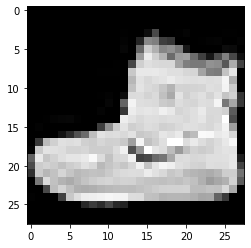

In [5]:
import matplotlib.pyplot as plt
indice = 0
plt.imshow(training_images[indice],cmap='gray', vmin=0, vmax=255)
print(training_labels[indice])
print(training_images[indice])

Veamos qué dimensiones tienen estas imágenes. Son todas iguales. 

In [6]:
import numpy as np
np.shape(training_images[indice])

(28, 28)

Son imágenes por tanto de 28 x 28 píxels. 

Nótese que todos los valores están entre 0 y 255. Cuando se entrena una red neuronal, y debido a varias razones, es necesario reescalar los valores al intervalo 0-1. El proceso se denomina "normalizar" los datos de entrado. Afortunadamente, en Python es muy sencillo dividir un vector completo entre un escalar: 

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## Definición del modelo

A continuación diseñaremos el modelo. Existen algunos conceptos a tener en cuenta. Ejecute el siguiente bloque: 

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: Define una SECUENCIA de capas en la Red Neuronal.

**Flatten**: Cada imagen se ha representado con una matriz de 28x28 pixels. Al indicar Flatten, se convierten en un vector de 1 dimensión, construido concatenando las filas (al estilo de la orientación por filas del lenguaje C). Se genera por tanto un conjunto de 28*28 = 784. Este es el tamaño de entrada a la red neuronal. 

**Dense**: Se añade una capa oculta, de 128 neuronas densamente conectadas. Se define una **función de activación** para indicar qué debe hacer. Existen muchas opciones. En este caso se ha tomado **relu**. Además, se añade una segunda capa de 10 neuronas densamente conectadas, pues la clasificación se establece en base a 10 tipos, vistos anteriormente. 

**Relu** significa realmente "Si X>0 devolver X; si no, devolver 0" -- por tanto, lo que realmente hace es pasar valores positivos a la siguiente capa. 

**Softmax** toma un conjunto de valores, y selecciona el mayor de ellos. Por ejemplo, si la salida de la capa precedente fuese [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], toma el valor mayor, y convierte este vector en una lista, tal que el 1 aparece en la posición del máximo, y el resto aparece etiquetado como 0. 



El siguiente paso, una vez definido el modelo, es construir el modelo de aprendizaje. Esto se hace compilándolo con unas funciones para el optimizador y las funciones (se debe elegir el optimizador, la función de pérdida, y la métrica).



In [9]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Posteriormente, con **model.fit**, entrenando la red a partir de los datos y etiquetas del conjunto de entrenamiento. En este caso se van a generar 5 iteraciones. En cada uno se podrá observar la función de pérdida (loss), que debe ir disminuyendo entre etapas, y la precisión del ajuste en las muestras (acc), que es un parámetros que debe tender a 1 cuanto mejor sea el ajuste. 

Pruebe aumentar el número de epochs y observe su efecto sobre los parámetros loss y acc. 


In [10]:
model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4991 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3782 - acc: 0.8628
Epoch 3/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3384 - acc: 0.8764
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3145 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2956 - acc: 0.8909


Cuando se ha entrenado, se observará un valor de la precisión (acc) próximo a 0.9. Por ejemplo, para 5 iteraciones, se obtiene acc=0.8909 (puede variar un poco dependiendo del entorno de ejecución). Esto indica que la red es, aproximadamente, un 90% de precisa clasificando los propios datos de entrenamiento. 

¿Funcionará con datos que no haya "visto" la red previamente?. Esta cuestión es clave. Usaremos la función `model.evaluate` sobre el conjunto de datos de verificación. Debemos aportar tanto los datos de entrada, como las etiquetas de clasificación correctas, para poder compararlo con las prestaciones de la Red Neuronal. 

In [11]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.3564 - acc: 0.8752


[0.35640818417072295, 0.8752]

Se observa que la precisión sobre el conjunto de pruebas, es de aproximadamente un 88%. Funciona como se esperaba, ya que no es posible que obtengamos tan buen resultado como con las imágenes que la red ya "ha visto" y entrenado. Existen formas de mejorar la precisión. 

Para explorar, pruebe realizar los siguientes ejercicios:


# Ejercicios

###Ejercicio 1:
Para este ejercicio deberá correr el código de la siguiente celda. Este código genera un conjunto de clasificaciones para cada imagen del conjunto de verificación, e imprime la primera entrada en la clasificación. La salida, tras ejecutar el bloque de código, es una lista de números. ¿Por qué cree que ocurre eso, y qué representan estos números?

In [12]:
classifications = model.predict(test_images)

print(classifications[0])

[1.3991312e-06 2.5316421e-08 7.0266378e-07 4.1339078e-07 2.7580128e-07
 6.6107651e-04 4.7181970e-06 2.7052587e-02 1.3566026e-05 9.7226518e-01]


Pista: pruebe ejecutar `print(test_labels[0])` y observará que se obtiene un 9. ¿Le ayuda eso a interpretar el vector anterior?. 

In [13]:
print(test_labels[0])

9


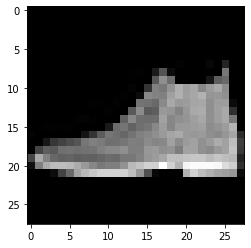

In [14]:
import matplotlib.pyplot as plt
indice = 0
plt.imshow(test_images[indice],cmap='gray', vmin=0, vmax=1)

### ¿Qué representa la lista?


1.   Son 10 valores aleatorios sin sentido. 
2.   Son las 10 primeras clasificaciones que se hicieron.  It's the first 10 classifications that the computer made
3.   Representan la probabilidad de que la imagen pertenezca a cada una de las 10 clases. 




#### Respuesta
La respuesta correcta es (3).

La salida del modelo es una lista de 10 números. Estos números son las probabilidades de que el valor clasificado corresponda a las etiquetas 0, 1, 2 ... 9. En este caso, el valor más próximo a 1 es el de la última posición. Por eso, esta imagen se clasifica con la etiqueta de la más probable: la última (9).

En ocasiones aparecen valores con probabilidad de ocurrencia intermedia. Por ejemplo, en este caso podría clasificarse como "zapatilla", que es la etiqueta número 7. Por eso hay un valor no pequeño para la posición 7 en la probabilidad de ocurrencia. Al igual que ocurre con los humanos, hay ciertas imágenes que no son claras, y admiten una clasificación en varias clases. 

##Ejercicio 2: 
Vamos a echar un vistazo a las capas del modelo. En esta ocasión vamos a trabajar con un conjunto de datos diferente. Se trata de otro conjunto de datos sobre reconocimiento de números (del 0 al 9) escritos a mano. Estos datos están disponibles en **keras**, dentro del conjunto `mnist`. Puede consultar más sobre estos datos en [en caso de reconocimiento de dígitos de Kaggle](https://www.kaggle.com/ngbolin/mnist-dataset-digit-recognizer).

Experimentemos con diferentes valores de Dense. Por ejemplo, con 512 neuronas (se aumenta por tanto desde 128 a 512). 

¿Qué diferencias se observan para los parámetros loss, accuracy, tiempo de ejecución, etc?. ¿Por qué cree que ocurre esto?



In [15]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist # ¡Atención!. Ahora el conjunto de imagenes es otro. 

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=5)

1.15.0
11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1995 - acc: 0.9412
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0799 - acc: 0.9761
Epoch 3/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0521 - acc: 0.9837
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0351 - acc: 0.9892
Epoch 5/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0281 - acc: 0.9910


In [16]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0646 - acc: 0.9818


[0.06456566337976838, 0.9818]

In [0]:
classifications = model.predict(test_images)

[1.7653179e-09 4.0543315e-09 1.5433432e-06 9.0318055e-05 9.6630921e-14
 1.1169246e-08 4.5349323e-13 9.9990344e-01 2.2984223e-07 4.4724643e-06]
7


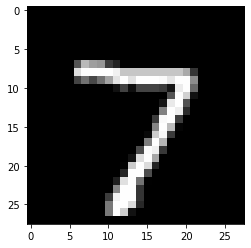

In [19]:
import matplotlib.pyplot as plt
indice = 0 # Pruebe cambiar el índice aquí para ver qué imagen se está intentando clasificar
plt.imshow(test_images[indice],cmap='gray', vmin=0, vmax=1)
print(classifications[indice])
print(test_labels[indice])

### Incremente el número de neuronas a 1024. ¿Cuál es el impacto?

1. El entrenamiento lleva más tiempo, pero es más preciso.
2. El entrenamiento lleva más tiempo, pero no tiene efecto en la precisión. 
3. El entrenamiento se lleva el mismo tienpo, pero la precisión es mayor. 


In [21]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist # ¡Atención!. Ahora el conjunto de imagenes es otro. 

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1844 - acc: 0.9445
Epoch 2/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0747 - acc: 0.9764
Epoch 3/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0486 - acc: 0.9844
Epoch 4/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0348 - acc: 0.9889
Epoch 5/5
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0696 - acc: 0.9808


[0.06960518451572789, 0.9808]

####Respuesta
La respuesta correcta es (1). Añadiendo más neuronas, el tiempo de cálculo es mayor, pero se obtendrá mayor precisión. Esto no significa que pueda deducirse que, como regla general, "más es mejor". De hecho, no mejora la precisión sobre las imágenes de conjunto de verificación. 

##Ejercicio 3: 

¿Qué ocurre si se elimina la capa `Flatten()`?. ¿Por qué ocurre esto?

Se obtiene un error sobre la forma de los datos. La imagen es 28x28, y 28 capas de 28 neuronas no es posible. Es más sensato "aplanar" el vector (que por otro lado, es como realmente se representan en memoria). Se convierte en un vector de 784x1. Observe el efecto:

In [20]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0
Train on 60000 samples
Epoch 1/5


InvalidArgumentError: ignored

##Ejercicio 4: 
Considere la capa de salida. ¿Por qué hay 10 elementos?. ¿Qué ocurre si se modifica, por ejemplo, a 5?

También se obtendrá un error, pero la red entrenará, ya que es un valor no esperado (Not a Number, o NaN). Como regla de buena práctica, debemos plantear un número de neuronas de la capa de salida igual al número de clases del problema de clasificación. 


In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: nan
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: nan
Epoch 3/5
60000/60000 [==============================] - 5s 88us/sample - loss: nan
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: nan
Epoch 5/5
10000/10000 [==============================] - 1s 66us/sample - loss: nan
[nan nan nan nan nan]
7


##Ejercicio 5:
Considere el efecto de añadir capas adicionales. ¿Qué ocurre si se añade una segunda capa de 512 neuronas detrás de la primera de 512 neuronas, manteniendo la capa de salida de 10 neuronas?. 

Respuesta: En este caso no se obtiene una mejora significativa, debido a que es un caso relativamente simple. Para casos más complejos (incluso con imágenes de color), será necesario añadir más capas. 

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

## Ejercicio 6: 
Considere el efecto que tiene realizar más iteraciones en el entrenamiento (epochs). ¿Por qué cree que ocurre lo que se observa?

Pruebe 15 iteraciones -- probablemente obtendrá un modelo con mejor pérdida que con 5. 

Pruebe 30 iteraciones -- se observará que hay oscilaciones en el valor de la función de pérdida. 

Esto pone en evidencia un fenómeno asociado a las redes neuronales: el sobre-entrenamiento (overfitting). 

A partir de un determinado número de iteraciones, no es posible mejorar el entrenamiento: al contrario, se produce un sobre-ajuste a los datos de entrenamiento. 

In [23]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

1.15.0
Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2527
Epoch 2/30
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1112
Epoch 3/30
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0773
Epoch 4/30
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0582
Epoch 5/30
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0445
Epoch 6/30
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0357
Epoch 7/30
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0287
Epoch 8/30
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0226
Epoch 9/30
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0198
Epoch 10/30
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0151
Epoch 11/30
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0139


## Ejercicio 7: 

Antes de entrenar, se normalizaron los datos. Desde el rango [0-255] se llevaron al rango [0-1]. ¿Qué efecto tiene omitir esta parte?. Veamos en el siguiente ejemplo: 


In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images*1.0 #Se convierten en floating-point
test_images=test_images*1.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

## Ejercicio 8: Uso de callbacks para detener el entrenamiento 

Anteriormente se observó que al aumentar el número de iteraciones no se conseguía mejorar por encima de un nivel. Sería deseable interrumpir el entrenamiento cuando se alcancen un número de iteraciones. 

Para esto se va a generar una clase, que permita detener la ejecución cuando se haya conseguido un cierto nivel de precisión. 

In [24]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nSe ha alcanzado un 60% de precisión. ¡Cancelando el entrenamiento!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.4744
Epoch 2/5
59808/60000 [============================>.] - ETA: 0s - loss: 0.3605
Se ha alcanzado un 60% de precisión. ¡Cancelando el entrenamiento!
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3609


## Ejercicio 9: Entrenamiento condicionado por callbacks. Otro ejemplo. 

Podemos hacer algo parecido controlando, con callbacks, la precisión alcanzada, en vez de la función de pérdida. 

En esta ocasión le vamos a indicar que el tamaño de los datos de entrada sea de 28x28 pixels. 

In [27]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.6): # Nota: en Tensorflow 2.0 sustituir 'acc' por 'accuracy'
      print("\nSe ha alcanzado el 60% de precisión. ¡Stop!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

import numpy as np
print("Dimensión de las imágenes",np.shape(x_train[0]))

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Dimensión de las imágenes (28, 28)
Train on 60000 samples
Epoch 1/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.4710 - acc: 0.8314
Se ha alcanzado el 60% de precisión. ¡Stop!
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4711 - acc: 0.8314
